In [117]:
from PIL import Image
import numpy as np

import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.matplotlib.style.use('dark_background') # Optional!

In [118]:
import os
from astropy.io import fits

In [119]:
spectrum_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\helium.FIT"
#spectrum_filename = "aldebaran_3s_1.bmp"

In [120]:
image_data = fits.getdata(spectrum_filename)

In [121]:
image_data

array([[1105, 1101, 1125, ..., 1970, 1080, 1045],
       [1090, 1123, 1095, ..., 1057, 1051, 1047],
       [1106, 1111, 1114, ..., 1049, 1042, 1050],
       ...,
       [1100, 1124, 1142, ..., 1055, 1055, 1034],
       [1086, 1125, 1093, ..., 1042, 1027, 1051],
       [1092, 1125, 1112, ..., 1067, 1032, 1039]], dtype=uint16)

In [122]:
image_array = np.array(image_data)
image_array, image_array.shape

(array([[1105, 1101, 1125, ..., 1970, 1080, 1045],
        [1090, 1123, 1095, ..., 1057, 1051, 1047],
        [1106, 1111, 1114, ..., 1049, 1042, 1050],
        ...,
        [1100, 1124, 1142, ..., 1055, 1055, 1034],
        [1086, 1125, 1093, ..., 1042, 1027, 1051],
        [1092, 1125, 1112, ..., 1067, 1032, 1039]], dtype=uint16),
 (1020, 1530))

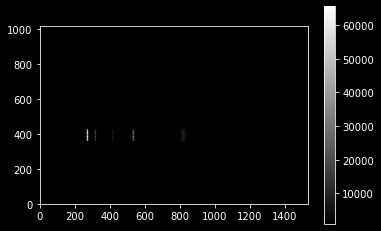

In [123]:
pl.imshow(image_data, cmap='gray')
pl.colorbar()

In [124]:
yvals = np.argmax(image_data, axis=0)
xvals = np.arange(image_data.shape[1])

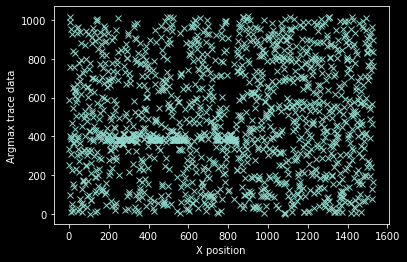

In [125]:
pl.plot(xvals, yvals, 'x')
pl.ylabel("Argmax trace data")
pl.xlabel("X position");

In [126]:
bad_pixels = (yvals < 330) | (yvals > 440)

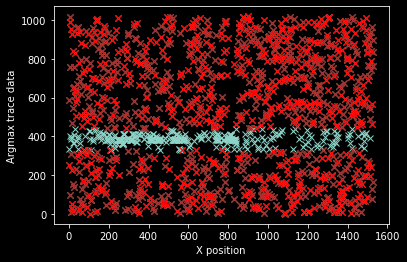

In [127]:
pl.plot(xvals, yvals, 'x')
pl.plot(xvals[bad_pixels], yvals[bad_pixels], 'rx')
pl.ylabel("Argmax trace data")
pl.xlabel("X position");

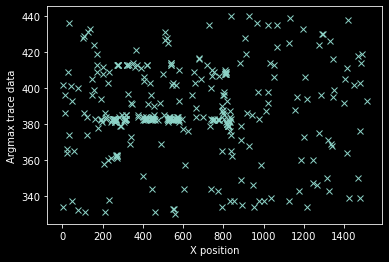

In [128]:
pl.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
pl.ylabel("Argmax trace data")
pl.xlabel("X position");

In [151]:
bad_pixels = (yvals < 380) | (yvals > 420)

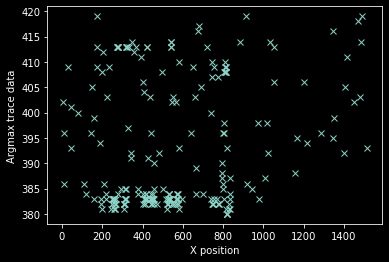

In [152]:
pl.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
pl.ylabel("Argmax trace data")
pl.xlabel("X position");

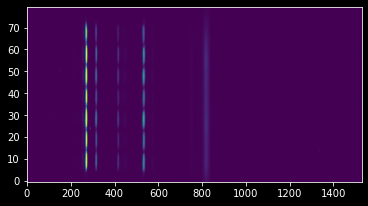

In [166]:
pl.imshow(image_array[355:435,:])
pl.gca().set_aspect(10)

In [168]:
yaxis = np.repeat(np.arange(355, 465)[:,None],
                  image_array.shape[1], axis=1)
background = np.median(image_array)
# moment 1 is the data-weighted average of the Y-axis coordinates
weighted_yaxis_values = np.average(yaxis, axis=0,
                                   weights=image_array[355:465,:] - background)

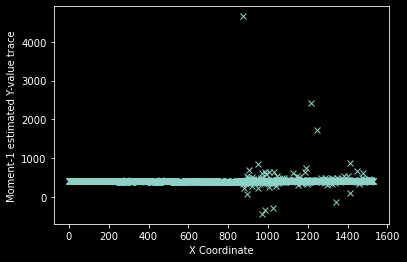

In [169]:
pl.plot(xvals, weighted_yaxis_values, 'x')
pl.xlabel("X Coordinate")
pl.ylabel("Moment-1 estimated Y-value trace");

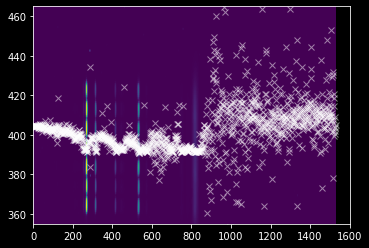

In [171]:
# we need to use the 'extent' keyword to have the axes correctly labeled
pl.imshow(image_array[355:465,:],
          extent=[0,image_array.shape[1],355,465])
pl.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
pl.plot(xvals, weighted_yaxis_values, 'wx', alpha=0.5)
pl.axis((0,1600,355,465));

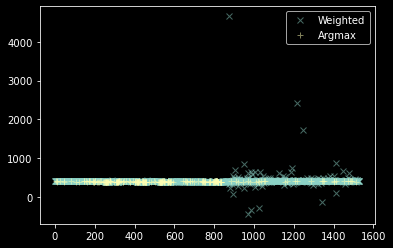

In [172]:
pl.plot(xvals, weighted_yaxis_values, 'x', label="Weighted", alpha=0.5)
pl.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
pl.legend(loc='best');

In [181]:
bad_moments = (weighted_yaxis_values > 460) | (weighted_yaxis_values < 430)

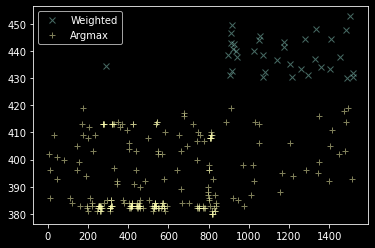

In [182]:
pl.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', label="Weighted", alpha=0.5)
pl.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
pl.legend(loc='best');

In [183]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter

In [184]:
# We fit a 2nd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])

In [185]:
fitted_polymodel

<Polynomial1D(2, c0=432.73444262, c1=0.01307422, c2=-0.00000655)>

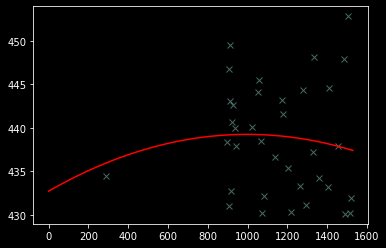

In [186]:
pl.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
pl.plot(xvals, fitted_polymodel(xvals), color='r');

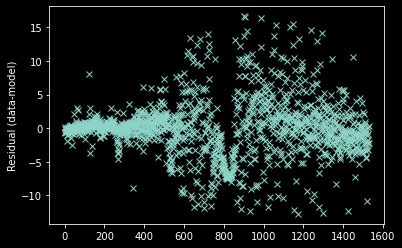

In [106]:
pl.plot(xvals[~bad_moments],
        weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
pl.ylabel("Residual (data-model)");

In [107]:
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
fitted_polymodel

<Polynomial1D(3, c0=445.50291538, c1=-0.01538095, c2=0.0000192, c3=-0.00000001)>

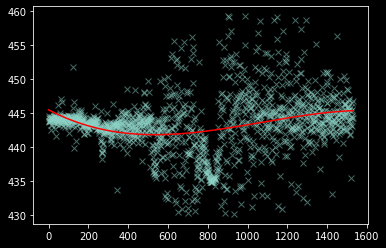

In [108]:
pl.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
pl.plot(xvals, fitted_polymodel(xvals), color='r');

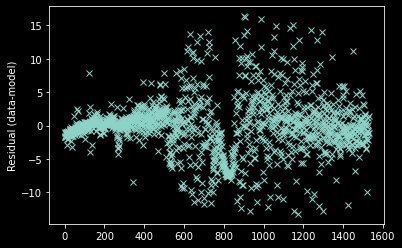

In [109]:
pl.plot(xvals[~bad_moments],
      weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
pl.ylabel("Residual (data-model)");

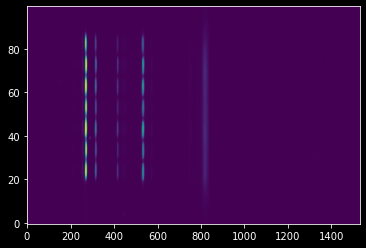

In [116]:
pl.imshow(image_array[430:460,:],
          extent=[0,image_array.shape[1],430,460])
pl.gca().set_aspect(10);